# Dog_vs_Cats_Kaggle_CV_with_Keras_TF

This sample taken from F.Chollet´s book will show different CV techniques around a Kaggle Dataset.
Create an algorithm to distinguish dogs from cats

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline



# 1- Download Dataset from Kaggle

In [13]:
# Only run this cell once

import kaggle
kaggle.api.authenticate()
!kaggle competitions download -c dogs-vs-cats

# You need to log into your Kaggle account and accept the terms of the competition


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<03:03, 4.64MB/s]
  1%|          | 5.00M/812M [00:00<00:45, 18.4MB/s]
  1%|          | 9.00M/812M [00:00<00:31, 26.6MB/s]
  2%|▏         | 14.0M/812M [00:00<00:24, 34.3MB/s]
  2%|▏         | 19.0M/812M [00:00<00:22, 37.3MB/s]
  3%|▎         | 24.0M/812M [00:00<00:20, 39.7MB/s]
  4%|▎         | 29.0M/812M [00:00<00:19, 41.6MB/s]
  4%|▍         | 34.0M/812M [00:01<00:19, 42.2MB/s]
  5%|▍         | 39.0M/812M [00:01<00:19, 42.3MB/s]
  5%|▌         | 44.0M/812M [00:01<00:18, 43.4MB/s]
  6%|▌         | 49.0M/812M [00:01<00:18, 44.1MB/s]
  7%|▋         | 54.0M/812M [00:01<00:20, 39.2MB/s]
  7%|▋         | 58.0M/812M [00:01<00:33, 23.5MB/s]
  8%|▊         | 65.0M/812M [00:02<00:24, 31.6MB/s]
  9%|▉         | 72.0M/812M [00:02<00:19, 39.5MB/s]
 10%|▉         | 78.0M/812M [00:02<00:17, 44.0MB/s]
 10%|█         | 84.0M/812M [00:02<00:16, 45.0MB/s]
 11%|█         | 89.0M/812M [00:02<00:17, 43.4MB/s]
 12%|█▏        | 94.

## Create a small subset from the downloaded data

In [9]:
import os, shutil, pathlib

train_dir = pathlib.Path('../dogs-vs-cats/train/train')
new_reduced_dir = pathlib.Path('../dogs_vs_cats_small')

def make_subset(subset_name, start_index, end_index):

    categories = ['cat', 'dog']
    for category in categories:
        dir = new_reduced_dir / subset_name / category
        os.makedirs(dir)
        
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for names in fnames:
            shutil.copyfile(src = train_dir / names,
                            dst = dir / names)

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index= 2500)

## Define a classification model

In [11]:
inputs = keras.Input(shape=(180,180,3)) # 180 x 180 pixels and 3 channels
x0 = layers.Rescaling(1./255)(inputs)
x1 = layers.Conv2D(filters = 32,  kernel_size = 3, activation = 'relu')(x0)
x2 = layers.MaxPool2D(pool_size = 2)(x1)
x3 = layers.Conv2D(filters = 64,  kernel_size = 3, activation = 'relu')(x2)
x4 = layers.MaxPool2D(pool_size = 2)(x3)
x5 = layers.Conv2D(filters = 128,  kernel_size = 3, activation = 'relu')(x4)

x6 = layers.MaxPool2D(pool_size = 2)(x5)
x7 = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x6)
x8 = layers.MaxPool2D(pool_size = 2)(x7)
x9 = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x8)
x10 = layers.Flatten()(x9)

output = layers.Dense(1, activation = 'sigmoid')(x10)

model = keras.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [17]:
model.compile(loss = "binary_crossentropy",
              optimizer ="rmsprop",
              metrics = ['accuracy'])

## Data Preparation

Next you need to do the data preprocessing by:

1 - Read the picture file

2 - Decode the jpeg to RGB grid of pixels

3 - Convert these into floating point tensors

4 - Resize to 180 x 180 

5 - Pack them into batches

Keras has the utility function "image_dataset_from_directory()" into the tensorflow.keras.utils

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_reduced_dir / "train",
    image_size = (180, 180),
    batch_size = 32)

validation_dataset = image_dataset_from_directory(
    new_reduced_dir / "validation",
    image_size = (180, 180),
    batch_size = 32)

test_dataset = image_dataset_from_directory(
    new_reduced_dir / "test",
    image_size = (180, 180),
    batch_size = 32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape", data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (32, 180, 180, 3)
labels batch shape (32,)


## Training and Evaluation

In [18]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convnet_from_scratch_dogs_vs_cats.keras',
        save_best_only = True,
        monitor = 'val_loss'
        )
    ]

history = model.fit(train_dataset, epochs = 30, validation_data=validation_dataset, callbacks = callbacks_list)

Epoch 1/30
63/63 [==============================] - 249s 4s/step - loss: 0.8740 - accuracy: 0.5100 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 278s 4s/step - loss: 0.7025 - accuracy: 0.5555 - val_loss: 0.7165 - val_accuracy: 0.5130
Epoch 3/30
63/63 [==============================] - 243s 4s/step - loss: 0.6618 - accuracy: 0.6225 - val_loss: 0.6447 - val_accuracy: 0.6410
Epoch 4/30
63/63 [==============================] - 218s 3s/step - loss: 0.6479 - accuracy: 0.6450 - val_loss: 0.6388 - val_accuracy: 0.6210
Epoch 5/30
63/63 [==============================] - 209s 3s/step - loss: 0.5860 - accuracy: 0.6890 - val_loss: 0.6622 - val_accuracy: 0.6040
Epoch 6/30
63/63 [==============================] - 208s 3s/step - loss: 0.5522 - accuracy: 0.7260 - val_loss: 0.6624 - val_accuracy: 0.6770
Epoch 7/30
63/63 [==============================] - 222s 4s/step - loss: 0.5011 - accuracy: 0.7575 - val_loss: 0.6499 - val_accuracy: 0.6550
Epoch 8/30
63

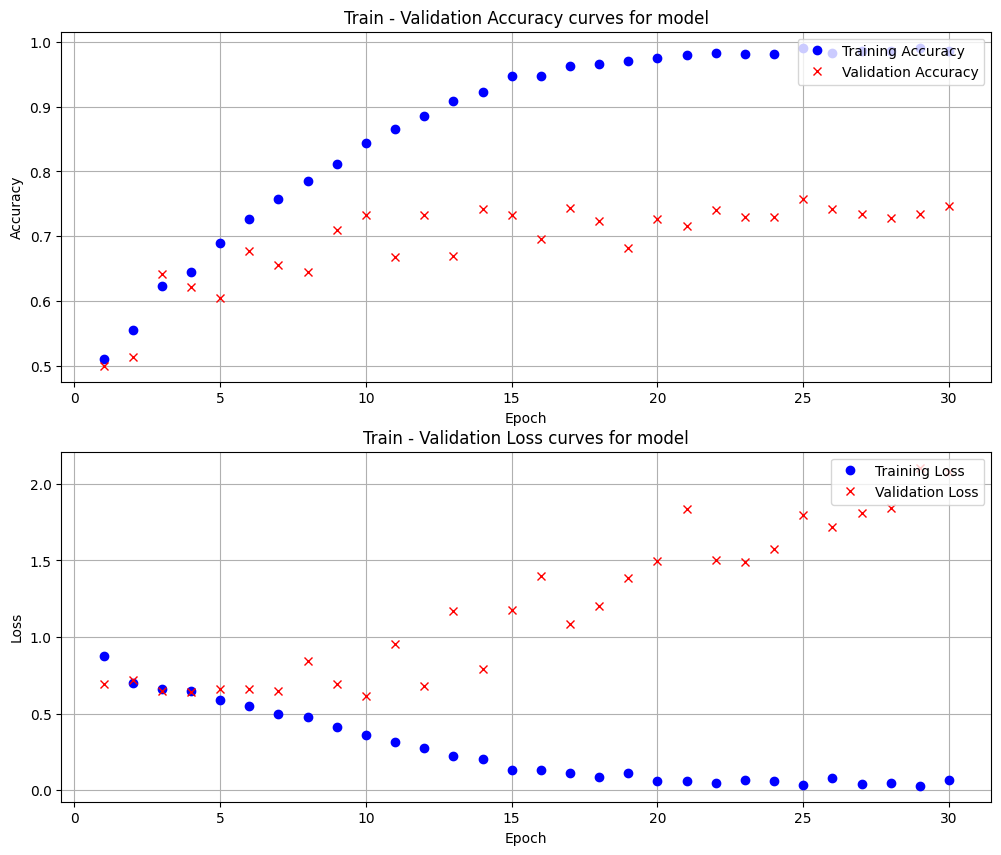

In [26]:
def plot_train_val_curves(history):
    # Plot model train and validation curves per epoch and saves the plot
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(2,1, figsize = (12,10))
    
    accuracy = history.history['accuracy']
    val_accuracy =  history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)
    ax[0].plot(epochs, accuracy, "bo", label = "Training Accuracy")
    ax[0].plot(epochs, val_accuracy, "rx", label = "Validation Accuracy")
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].grid(True)
    ax[0].legend(loc='upper right')
    title1 = 'Train - Validation Accuracy curves for ' + history.model.name
    
    ax[0].set_title(title1)
    
    ax[1].plot(epochs, loss, "bo", label = "Training Loss")
    ax[1].plot(epochs, val_loss, "rx", label = "Validation Loss")
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')

    ax[1].grid(True)
    ax[1].legend(loc='upper right')
    title2 = 'Train - Validation Loss curves for ' + history.model.name
    
    ax[1].set_title(title2)
    
    #path = os.path.join(model_dir, title + ".png" )
    #plt.savefig(path, dpi=500)
    plt.show()
    
plot_train_val_curves(history)    

The model is overfitting 

In [23]:
test_model = keras.models.load_model('convnet_from_scratch_dogs_vs_cats.keras')
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc: .3f}")

63/63 [==============================] - 58s 906ms/step - loss: 2.1894 - accuracy: 0.7370
Test Accuracy:  0.737


## Data Augmentation to fight overfitting

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
                                     )


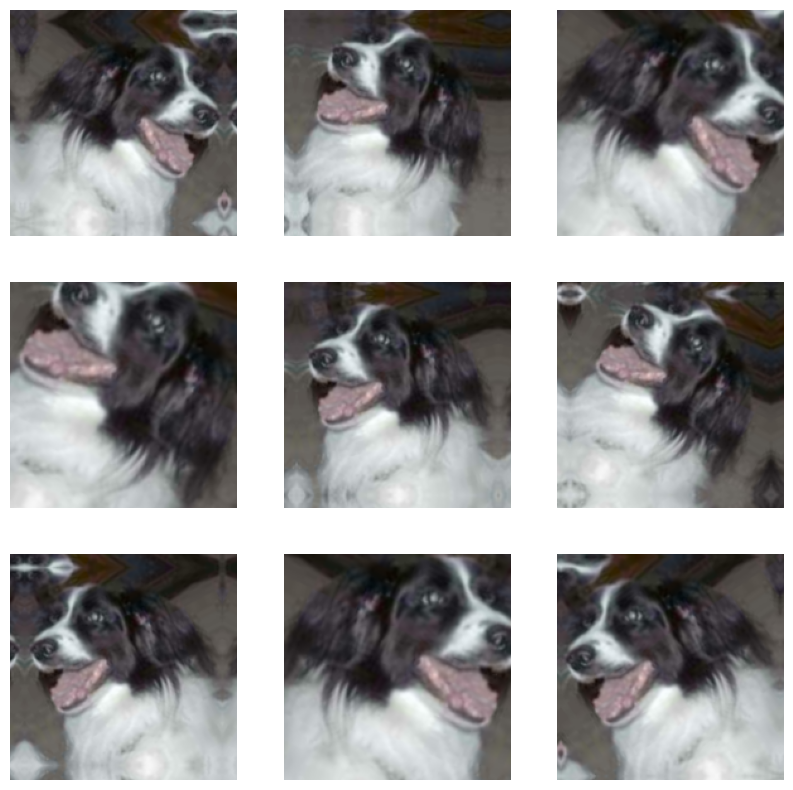

In [29]:
plt.figure(figsize=(10,10))

for images, _ in (train_dataset.take(1)):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis('off')

In [31]:
inputs = keras.Input(shape=(180,180,3)) # 180 x 180 pixels and 3 channels
x = data_augmentation(inputs)
x0 = layers.Rescaling(1./255)(x)
x1 = layers.Conv2D(filters = 32,  kernel_size = 3, activation = 'relu')(x0)
x2 = layers.MaxPool2D(pool_size = 2)(x1)
x3 = layers.Conv2D(filters = 64,  kernel_size = 3, activation = 'relu')(x2)
x4 = layers.MaxPool2D(pool_size = 2)(x3)
x5 = layers.Conv2D(filters = 128,  kernel_size = 3, activation = 'relu')(x4)

x6 = layers.MaxPool2D(pool_size = 2)(x5)
x7 = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x6)
x8 = layers.MaxPool2D(pool_size = 2)(x7)
x9 = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x8)
x10 = layers.Flatten()(x9)
x11 = layers.Dropout(0.5)(x10)

output = layers.Dense(1, activation = 'sigmoid')(x11)

model_aug = keras.Model(inputs = inputs, outputs = output)
model_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [32]:
model_aug.compile(loss = "binary_crossentropy",
              optimizer ="rmsprop",
              metrics = ['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convnet_from_scratch_dogs_vs_cats_augmented.keras',
        save_best_only = True,
        monitor = 'val_loss'
        )
    ]

history_aug = model_aug.fit(train_dataset, epochs = 80, validation_data=validation_dataset, callbacks = callbacks_list)

Epoch 1/80
63/63 [==============================] - 343s 5s/step - loss: 0.7553 - accuracy: 0.4795 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/80
63/63 [==============================] - 295s 5s/step - loss: 0.6996 - accuracy: 0.5215 - val_loss: 0.6894 - val_accuracy: 0.5510
Epoch 3/80
63/63 [==============================] - 237s 4s/step - loss: 0.6908 - accuracy: 0.5530 - val_loss: 0.6820 - val_accuracy: 0.5910
Epoch 4/80
63/63 [==============================] - 262s 4s/step - loss: 0.6613 - accuracy: 0.6090 - val_loss: 4.3076 - val_accuracy: 0.5020
Epoch 5/80
63/63 [==============================] - 297s 5s/step - loss: 0.6665 - accuracy: 0.6485 - val_loss: 0.6012 - val_accuracy: 0.6810
Epoch 6/80
63/63 [==============================] - 291s 5s/step - loss: 0.6358 - accuracy: 0.6450 - val_loss: 0.7383 - val_accuracy: 0.6430
Epoch 7/80
63/63 [==============================] - 252s 4s/step - loss: 0.5970 - accuracy: 0.6955 - val_loss: 0.6120 - val_accuracy: 0.6860
Epoch 8/80
63

## Making previous models more modular

In order to reuse later this models and also as exercise we will encapsulate the previous models into functions

In [ ]:
def cats_dogs_cnn_model(img_size):
    # img_size (180,180,3)
    inputs = keras.Input(shape=img_size) # 180 x 180 pixels and 3 channels
    x = layers.Rescaling(1./255)(inputs)
    list_filters = [32,64, 128, 256, 256]
    for size in enumerate(list_filters):
        x = layers.Conv2D(filters = size,  kernel_size = 3, activation = 'relu')(x)
        x = layers.MaxPool2D(pool_size = 2)(x)

    x = layers.Flatten()(x)

    output = layers.Dense(1, activation = 'sigmoid')(x10)

    model = keras.Model(inputs = inputs, outputs = output)
    return model
model.summary()